## Import libiraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import joblib
import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)
%matplotlib inline

## Load Data

In [2]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Shape of data

In [3]:
df.shape
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 51717
Number of columns: 17


## Information about data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

## Exploratory Data Analysis

### Data Cleaning

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop(columns=['url', 'name', 'address', 'phone', 'dish_liked', 'reviews_list', 'menu_item', 'listed_in(city)'], inplace=True)

In [7]:
df.shape

(51717, 9)

In [8]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [9]:
df.isnull().sum()

online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
dtype: int64

In [10]:
for col in df[['online_order','book_table','rate','location','rest_type', 'cuisines', 'approx_cost(for two people)',
               'listed_in(type)']]:
    
    print('Column:',col, '\n')
    print(f'Name of values:{df[col].unique()}')
    print()
    print(f'Number of values:{df[col].nunique()}', '\n')
    print(f'Count of value:\n{df[col].value_counts()}')
    print('_'*50, '\n')

Column: online_order 

Name of values:['Yes' 'No']

Number of values:2 

Count of value:
Yes    30444
No     21273
Name: online_order, dtype: int64
__________________________________________________ 

Column: book_table 

Name of values:['Yes' 'No']

Number of values:2 

Count of value:
No     45268
Yes     6449
Name: book_table, dtype: int64
__________________________________________________ 

Column: rate 

Name of values:['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']

Number of values:64 


In [11]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


## Data Preprocessing

### Rename some columns

In [12]:
df.rename(columns={'approx_cost(for two people)':'Cost2plates', 'listed_in(type)':'Type'}, inplace = True)
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [13]:
def rating(value):
    if(value == 'NEW' or value == '-'):
        return np.nan
    
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df['rate'] = df['rate'].apply(rating)

In [14]:
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [15]:
df['rate'].describe()

count    41665.000000
mean         3.700449
std          0.440513
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

In [16]:
df['rate'].fillna(df['rate'].mean(), inplace = True)
df['rate'].isnull().sum()

0

## Remove Null values

In [17]:
df.isnull().sum()

online_order      0
book_table        0
rate              0
votes             0
location         21
rest_type       227
cuisines         45
Cost2plates     346
Type              0
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(51148, 9)

In [20]:
df.isna().values.any()

False

In [21]:
df['Cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [22]:
def handlecomma(value):
    return float(value.replace(',', ''))
handlecomma('1,3')

13.0

In [23]:
df['Cost2plates'] = df['Cost2plates'].apply(handlecomma)
df['Cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [24]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [25]:
df.dtypes

online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
cuisines         object
Cost2plates     float64
Type             object
dtype: object

In [26]:
location = df['location'].value_counts()
location

BTM                      5071
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2109
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [27]:
location_lessthan_500 = location[location<500]
location_lessthan_500

Shivajinagar                     499
Cunningham Road                  491
Domlur                           482
Old Airport Road                 437
Ejipura                          434
Commercial Street                370
St. Marks Road                   343
Koramangala 8th Block            294
Vasanth Nagar                    293
Jeevan Bhima Nagar               268
Wilson Garden                    246
Bommanahalli                     236
Koramangala 3rd Block            216
Kumaraswamy Layout               191
Thippasandra                     191
Basaveshwara Nagar               187
Nagawara                         187
Seshadripuram                    165
Hennur                           159
Majestic                         155
HBR Layout                       153
Infantry Road                    151
Race Course Road                 139
City Market                      122
Yeshwantpur                      119
ITPL Main Road, Whitefield       113
Varthur Main Road, Whitefield    109
S

In [28]:
def locations(value):
    if value in location_lessthan_500:
        return 'others' 
    
    else:
        return value
df['location'] = df['location'].apply(locations)
df['location'].value_counts()

others                   8018
BTM                      5071
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2109
Indiranagar              2033
Jayanagar                1916
Marathahalli             1808
Bannerghatta Road        1611
Bellandur                1271
Electronic City          1248
Koramangala 1st Block    1237
Brigade Road             1218
Koramangala 7th Block    1176
Koramangala 6th Block    1129
Sarjapur Road            1049
Ulsoor                   1017
Koramangala 4th Block    1017
Banashankari              904
MG Road                   894
Kalyan Nagar              841
Richmond Road             804
Malleshwaram              724
Frazer Town               720
Basavanagudi              684
Residency Road            674
Brookefield               656
Banaswadi                 645
New BEL Road              644
Kammanahalli              640
Rajajinagar               591
Church Street             569
Lavelle Ro

In [29]:
cuisines = df['cuisines'].value_counts()
cuisines

North Indian                                      2858
North Indian, Chinese                             2355
South Indian                                      1822
Biryani                                            906
Bakery, Desserts                                   899
                                                  ... 
Mangalorean, Chinese, North Indian, Seafood          1
North Indian, Andhra, Chinese, Seafood               1
North Indian, South Indian, Biryani, Fast Food       1
Bengali, Oriya, South Indian                         1
Cafe, Continental, Steak                             1
Name: cuisines, Length: 2704, dtype: int64

In [30]:
cuisines_lessthan_200 = cuisines[cuisines<200]
cuisines_lessthan_200

Bakery, Fast Food                                   199
Continental                                         195
North Indian, Mughlai                               188
South Indian, North Indian, Chinese, Street Food    186
Cafe, Continental                                   173
                                                   ... 
Mangalorean, Chinese, North Indian, Seafood           1
North Indian, Andhra, Chinese, Seafood                1
North Indian, South Indian, Biryani, Fast Food        1
Bengali, Oriya, South Indian                          1
Cafe, Continental, Steak                              1
Name: cuisines, Length: 2667, dtype: int64

In [31]:
def cuisines(value):
    if value in cuisines_lessthan_200:
        return 'others' 
    
    else:
        return value
    
df['cuisines'] = df['cuisines'].apply(cuisines)
df['cuisines'].value_counts()

others                                 30865
North Indian                            2858
North Indian, Chinese                   2355
South Indian                            1822
Biryani                                  906
Bakery, Desserts                         899
Fast Food                                798
Desserts                                 760
Cafe                                     726
South Indian, North Indian, Chinese      724
Bakery                                   649
Chinese                                  554
Ice Cream, Desserts                      416
Chinese, North Indian                    405
Mithai, Street Food                      363
Desserts, Ice Cream                      350
North Indian, Chinese, Biryani           346
South Indian, North Indian               337
North Indian, South Indian               330
North Indian, South Indian, Chinese      305
Beverages                                284
North Indian, Biryani                    283
Biryani, K

In [32]:
rest_type = df['rest_type'].value_counts()
rest_type

Quick Bites                   19046
Casual Dining                 10273
Cafe                           3687
Delivery                       2578
Dessert Parlor                 2245
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Kiosk             2
Pop Up                            2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [33]:
rest_type_lessthan_100 = rest_type[rest_type<100]
rest_type_lessthan_100

Dessert Parlor, Bakery           85
Quick Bites, Dessert Parlor      84
Pub, Microbrewery                84
Food Truck                       84
Dessert Parlor, Beverage Shop    80
Beverage Shop, Dessert Parlor    79
Bakery, Cafe                     78
Quick Bites, Sweet Shop          75
Quick Bites, Bakery              60
Confectionery                    47
Casual Dining, Microbrewery      47
Microbrewery, Pub                42
Quick Bites, Cafe                41
Pub, Cafe                        40
Pub, Bar                         40
Dhaba                            40
Fine Dining, Bar                 40
Lounge, Casual Dining            37
Club                             37
Lounge, Bar                      36
Microbrewery                     30
Beverage Shop, Cafe              28
Cafe, Bar                        19
Quick Bites, Food Court          19
Bakery, Beverage Shop            16
Lounge, Cafe                     16
Lounge, Microbrewery             16
Cafe, Lounge                

In [34]:
def rest_type(value):
    if value in rest_type_lessthan_100:
        return 'others'
    else:
        return value
df['rest_type'] = df['rest_type'].apply(rest_type)
df['rest_type'].value_counts()

Quick Bites                    19046
Casual Dining                  10273
Cafe                            3687
Delivery                        2578
Dessert Parlor                  2245
Takeaway, Delivery              2014
others                          1493
Bakery                          1141
Casual Dining, Bar              1136
Beverage Shop                    865
Bar                              686
Food Court                       619
Sweet Shop                       468
Bar, Casual Dining               415
Lounge                           396
Pub                              357
Fine Dining                      346
Casual Dining, Cafe              311
Beverage Shop, Quick Bites       293
Bakery, Quick Bites              286
Mess                             264
Pub, Casual Dining               255
Sweet Shop, Quick Bites          178
Kiosk                            176
Dessert Parlor, Cafe             175
Cafe, Casual Dining              173
Cafe, Bakery                     164
C

In [35]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet
1,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",others,800.0,Buffet
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


### Feature Engineering

In [36]:
df[df['rate']>3.7]

,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Yes,Yes,4.100000,775,Banashankari,Casual Dining,others,800.0,Buffet
1,Yes,No,4.100000,787,Banashankari,Casual Dining,others,800.0,Buffet
2,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining",others,800.0,Buffet
4,No,No,3.800000,166,Basavanagudi,Casual Dining,others,600.0,Buffet
5,Yes,No,3.800000,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet
...,...,...,...,...,...,...,...,...,...
51707,No,No,3.900000,77,Whitefield,others,Finger Food,2000.0,Pubs and bars
51710,No,No,3.700449,0,Whitefield,Bar,Finger Food,900.0,Pubs and bars
51713,No,No,3.700449,0,Whitefield,Bar,Finger Food,600.0,Pubs and bars
51714,No,No,3.700449,0,Whitefield,Bar,Finger Food,2000.0,Pubs and bars


In [37]:
df[df['rate']<=3.7]

,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
6,No,No,3.6,8,others,Casual Dining,others,800.0,Buffet
19,Yes,No,3.1,13,Banashankari,Cafe,others,400.0,Cafes
20,Yes,No,3.0,62,Banashankari,Cafe,others,400.0,Cafes
21,Yes,No,3.7,180,Banashankari,Cafe,others,500.0,Cafes
...,...,...,...,...,...,...,...,...,...
51708,No,No,2.8,161,Whitefield,"Casual Dining, Bar",others,1200.0,Pubs and bars
51709,No,No,3.7,34,Whitefield,"Casual Dining, Bar",others,800.0,Pubs and bars
51711,No,No,2.5,81,Whitefield,"Casual Dining, Bar",others,800.0,Pubs and bars
51712,No,No,3.6,27,Whitefield,Bar,others,1500.0,Pubs and bars


In [38]:
def success(value):
    if value >3.7:
        return 1
    else:
        return 0
print(success(3.7))
print(success(3.8))
df['Is_Success'] = df['rate'].apply(success)
df.head()

0
1


,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,Is_Success
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet,1
1,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet,1
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",others,800.0,Buffet,1
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,0
4,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet,1


In [39]:
df.drop('rate', axis=1, inplace=True)

## Data Visualization

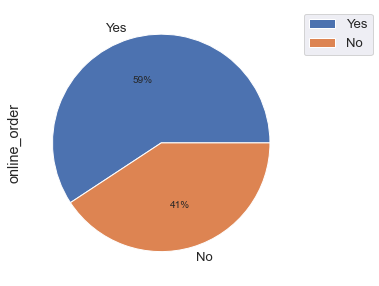

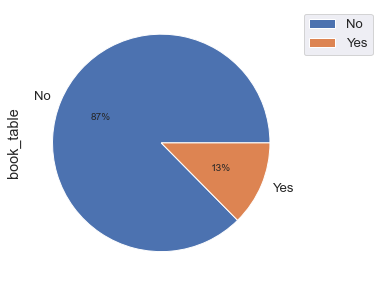

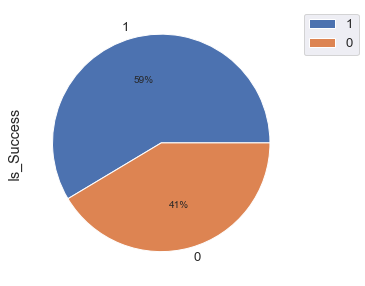

In [40]:
for col in df[['online_order', 'book_table', 'Is_Success']]:
    plt.figure(figsize=(10,5))
    df[col].value_counts().plot.pie(autopct='%2.f%%')
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

In [41]:
df.head()

,online_order,book_table,votes,location,rest_type,cuisines,Cost2plates,Type,Is_Success
0,Yes,Yes,775,Banashankari,Casual Dining,others,800.0,Buffet,1
1,Yes,No,787,Banashankari,Casual Dining,others,800.0,Buffet,1
2,Yes,No,918,Banashankari,"Cafe, Casual Dining",others,800.0,Buffet,1
3,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,0
4,No,No,166,Basavanagudi,Casual Dining,others,600.0,Buffet,1


In [42]:
def count_plot(col):
    plt.figure(figsize = (15,7))
    sns.countplot(df[col], palette='Set1')
    plt.xticks(rotation=90)
    plt.show()

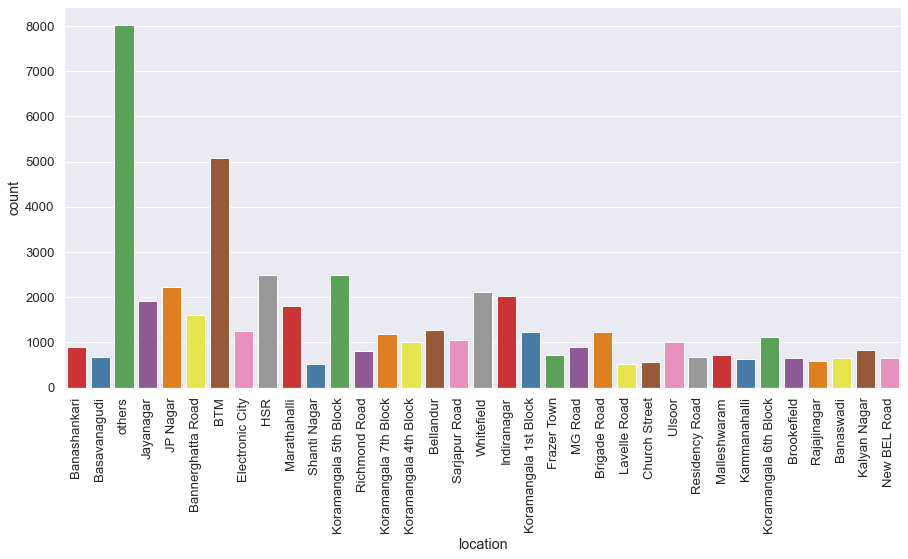

In [43]:
count_plot('location')

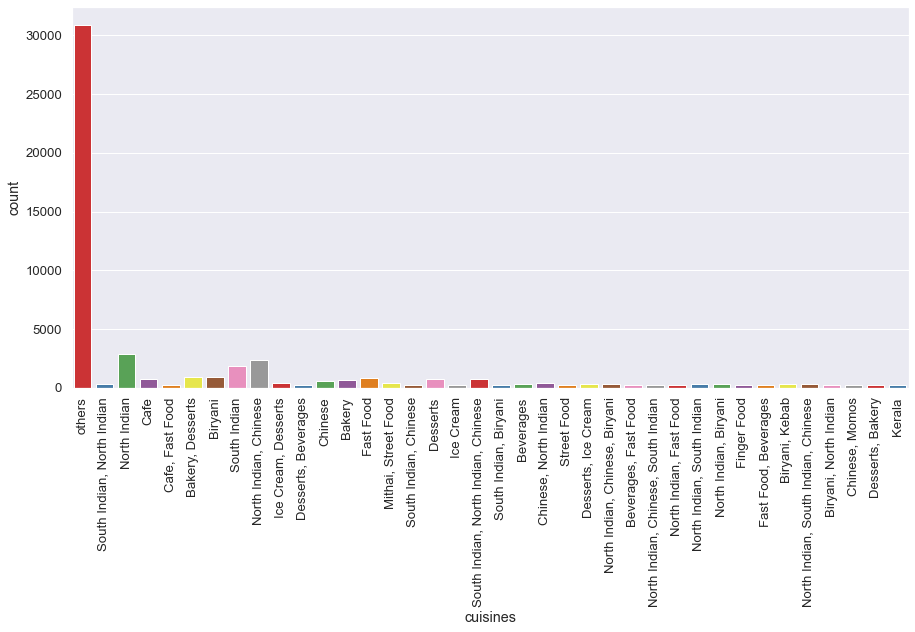

In [44]:
count_plot('cuisines')

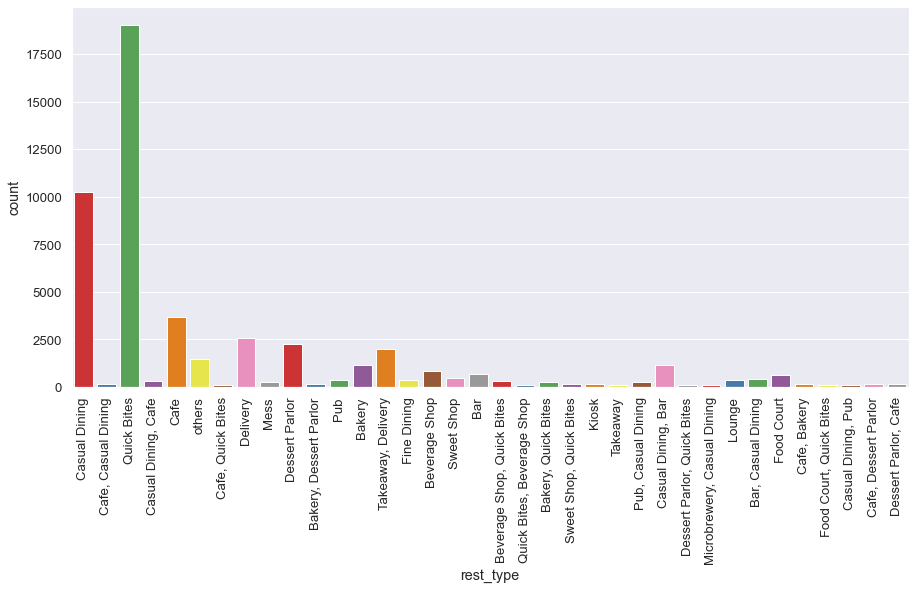

In [45]:
count_plot('rest_type')

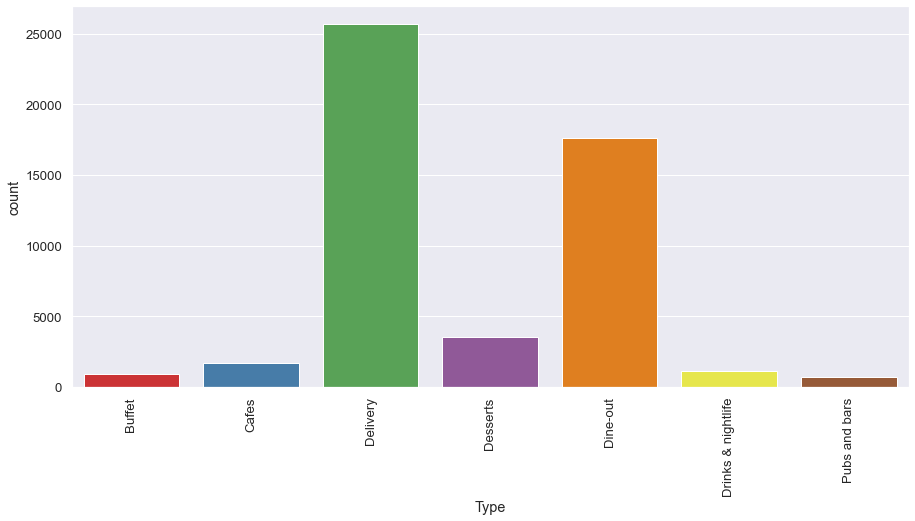

In [46]:
count_plot('Type')

In [47]:
def count_hue_plot(col):
    plt.figure(figsize = (15,7))
    sns.countplot(df[col],hue=df['Is_Success'], palette='summer')
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1,1), loc=2)
    plt.show()

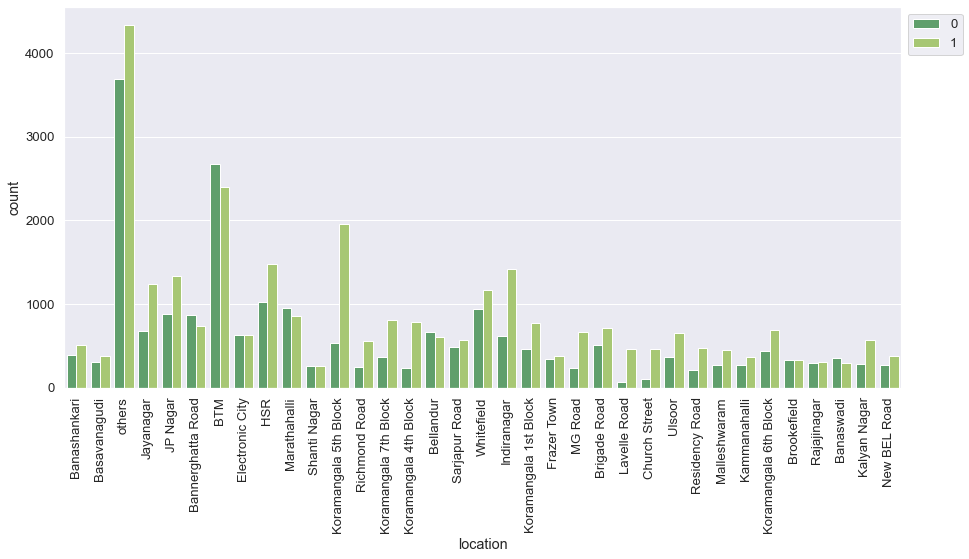

In [48]:
count_hue_plot('location')

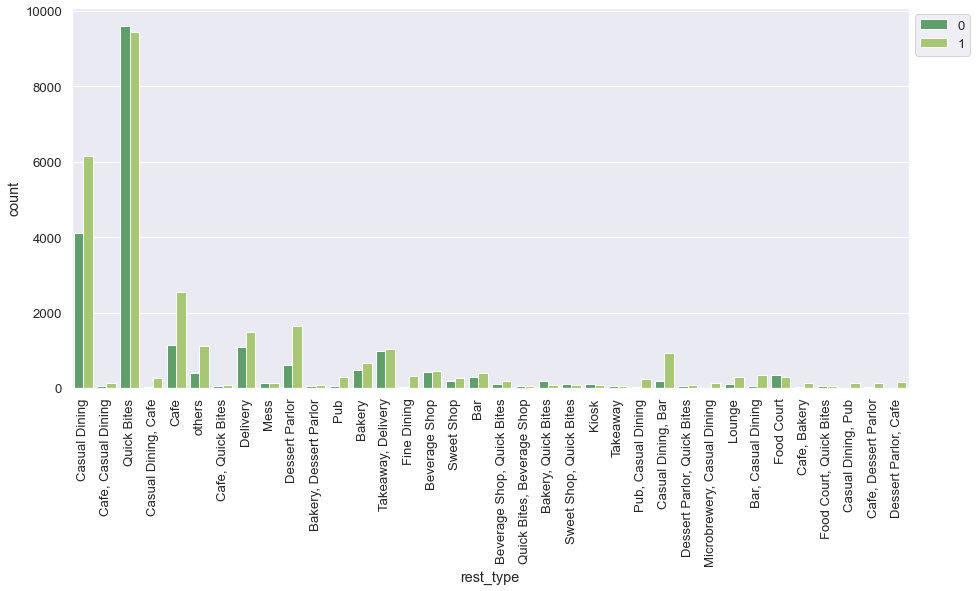

In [49]:
count_hue_plot('rest_type')

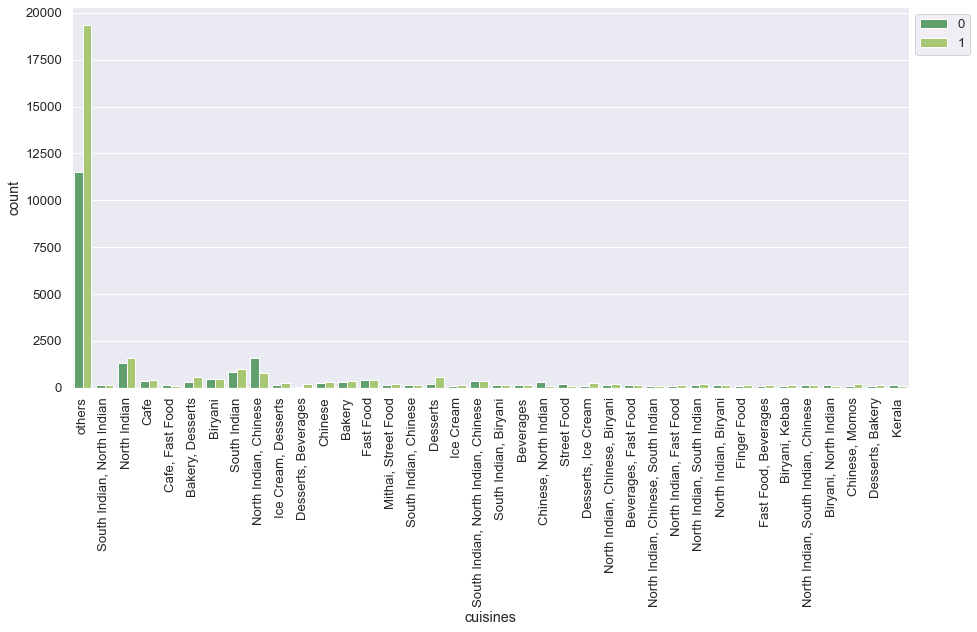

In [50]:
count_hue_plot('cuisines')

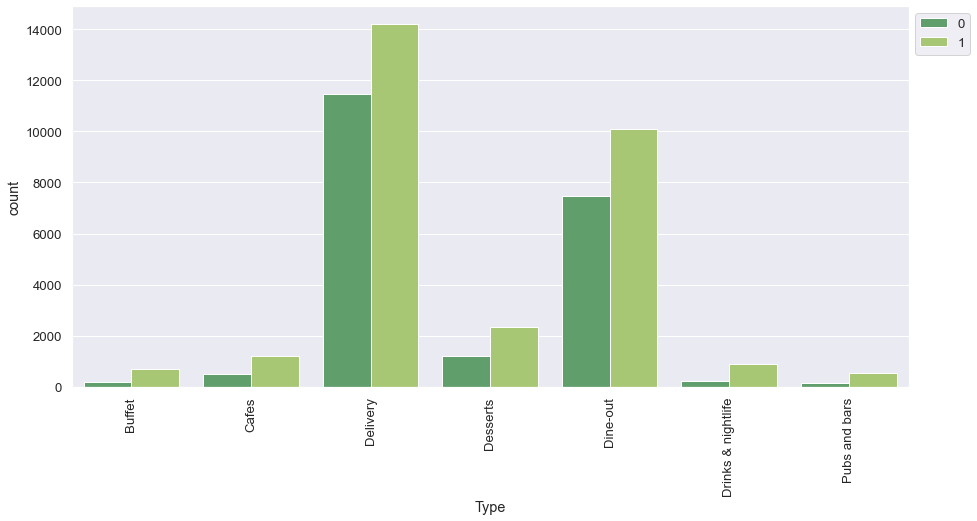

In [51]:
count_hue_plot('Type')

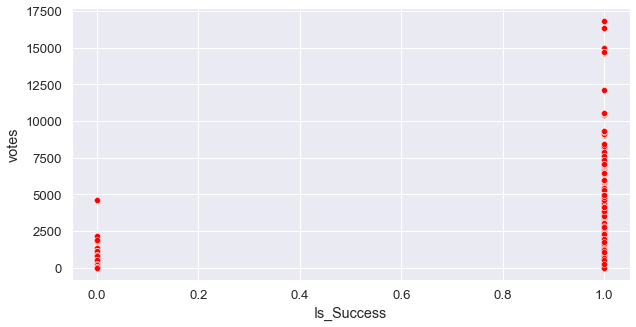

In [52]:
plt.figure(figsize=(10,5))
sns.scatterplot(y=df['votes'], x=df['Is_Success'], color='red')
plt.show()

In [53]:
df.head()

,online_order,book_table,votes,location,rest_type,cuisines,Cost2plates,Type,Is_Success
0,Yes,Yes,775,Banashankari,Casual Dining,others,800.0,Buffet,1
1,Yes,No,787,Banashankari,Casual Dining,others,800.0,Buffet,1
2,Yes,No,918,Banashankari,"Cafe, Casual Dining",others,800.0,Buffet,1
3,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,0
4,No,No,166,Basavanagudi,Casual Dining,others,600.0,Buffet,1


In [54]:
df.shape

(51148, 9)

In [55]:
df_copy = df.copy()
df_copy

,online_order,book_table,votes,location,rest_type,cuisines,Cost2plates,Type,Is_Success
0,Yes,Yes,775,Banashankari,Casual Dining,others,800.0,Buffet,1
1,Yes,No,787,Banashankari,Casual Dining,others,800.0,Buffet,1
2,Yes,No,918,Banashankari,"Cafe, Casual Dining",others,800.0,Buffet,1
3,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,0
4,No,No,166,Basavanagudi,Casual Dining,others,600.0,Buffet,1
...,...,...,...,...,...,...,...,...,...
51712,No,No,27,Whitefield,Bar,others,1500.0,Pubs and bars,0
51713,No,No,0,Whitefield,Bar,Finger Food,600.0,Pubs and bars,1
51714,No,No,0,Whitefield,Bar,Finger Food,2000.0,Pubs and bars,1
51715,No,Yes,236,others,Bar,Finger Food,2500.0,Pubs and bars,1


In [56]:
df_copy = pd.get_dummies(data=df_copy, columns=['online_order', 'book_table', 'location', 'rest_type', 'cuisines', 'Type'])
df_copy.head()

,votes,Cost2plates,Is_Success,online_order_No,online_order_Yes,book_table_No,book_table_Yes,location_BTM,location_Banashankari,location_Banaswadi,...,"cuisines_South Indian, North Indian, Chinese",cuisines_Street Food,cuisines_others,Type_Buffet,Type_Cafes,Type_Delivery,Type_Desserts,Type_Dine-out,Type_Drinks & nightlife,Type_Pubs and bars
0,775,800.0,1,0,1,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,0
1,787,800.0,1,0,1,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
2,918,800.0,1,0,1,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
3,88,300.0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,166,600.0,1,1,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [57]:
df_copy.head()

,votes,Cost2plates,Is_Success,online_order_No,online_order_Yes,book_table_No,book_table_Yes,location_BTM,location_Banashankari,location_Banaswadi,...,"cuisines_South Indian, North Indian, Chinese",cuisines_Street Food,cuisines_others,Type_Buffet,Type_Cafes,Type_Delivery,Type_Desserts,Type_Dine-out,Type_Drinks & nightlife,Type_Pubs and bars
0,775,800.0,1,0,1,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,0
1,787,800.0,1,0,1,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
2,918,800.0,1,0,1,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
3,88,300.0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,166,600.0,1,1,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [58]:
x = df_copy.drop('Is_Success', axis=1)
y = df_copy['Is_Success']

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)            

In [60]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [61]:
models = {
    "LogisticRegression": LogisticRegression(),
    "Naive" : GaussianNB(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "XGBClassifier" : xgb.XGBClassifier()
}

Using model: LogisticRegression 

Training Score: 0.6693875555990029
Test Score: 0.6686217008797654
F1_Score: 0.7174529088181364 

AxesSubplot(0.125,0.125;0.62x0.755)


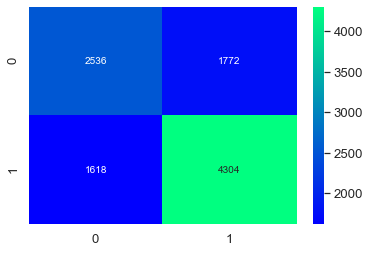

              precision    recall  f1-score   support

           0       0.61      0.59      0.60      4308
           1       0.71      0.73      0.72      5922

    accuracy                           0.67     10230
   macro avg       0.66      0.66      0.66     10230
weighted avg       0.67      0.67      0.67     10230

------------------------------
Using model: Naive 

Training Score: 0.5824820372452222
Test Score: 0.5833822091886608
F1_Score: 0.4960983684086072 

AxesSubplot(0.125,0.125;0.62x0.755)


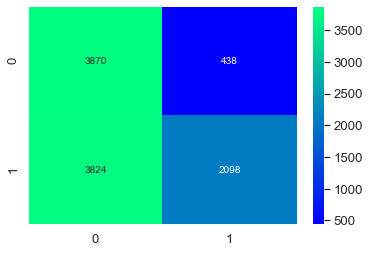

              precision    recall  f1-score   support

           0       0.50      0.90      0.64      4308
           1       0.83      0.35      0.50      5922

    accuracy                           0.58     10230
   macro avg       0.67      0.63      0.57     10230
weighted avg       0.69      0.58      0.56     10230

------------------------------
Using model: DecisionTreeClassifier 

Training Score: 0.9976049660296202
Test Score: 0.9710654936461388
F1_Score: 0.9750421585160203 

AxesSubplot(0.125,0.125;0.62x0.755)


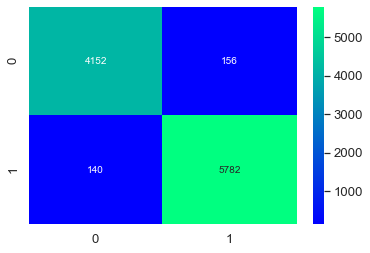

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4308
           1       0.97      0.98      0.98      5922

    accuracy                           0.97     10230
   macro avg       0.97      0.97      0.97     10230
weighted avg       0.97      0.97      0.97     10230

------------------------------
Using model: RandomForestClassifier 

Training Score: 0.9976049660296202
Test Score: 0.967644183773216
F1_Score: 0.9720745802750358 

AxesSubplot(0.125,0.125;0.62x0.755)


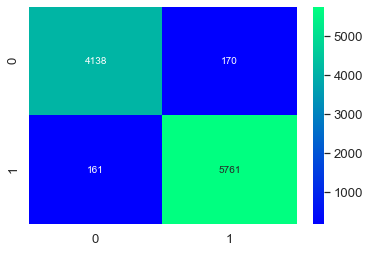

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4308
           1       0.97      0.97      0.97      5922

    accuracy                           0.97     10230
   macro avg       0.97      0.97      0.97     10230
weighted avg       0.97      0.97      0.97     10230

------------------------------
Using model: XGBClassifier 

Training Score: 0.9199129967251576
Test Score: 0.9118279569892473
F1_Score: 0.9235593220338983 

AxesSubplot(0.125,0.125;0.62x0.755)


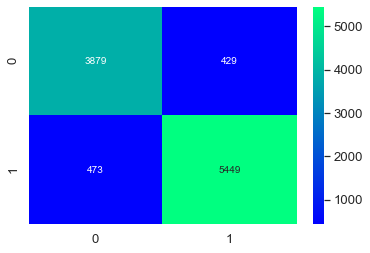

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      4308
           1       0.93      0.92      0.92      5922

    accuracy                           0.91     10230
   macro avg       0.91      0.91      0.91     10230
weighted avg       0.91      0.91      0.91     10230

------------------------------


In [62]:
for name, model in models.items():
    print(f'Using model: {name}', '\n')
    
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    
    y_pred = model.predict(x_test)
    print(f'Test Score: {accuracy_score(y_test, y_pred)}')
    print(f'F1_Score: {f1_score(y_test, y_pred)}', '\n')
    
    print(sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='winter', fmt='d'))
    plt.show()
    print(classification_report(y_test, y_pred))
    print('-'*30)

Training Score: 0.9976049660296202
Test Score: 0.9675464320625611
F1_Score: 0.9719452425215481 

AxesSubplot(0.125,0.125;0.62x0.755)


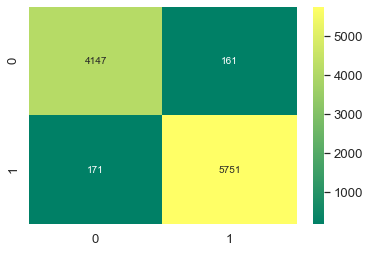

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4308
           1       0.97      0.97      0.97      5922

    accuracy                           0.97     10230
   macro avg       0.97      0.97      0.97     10230
weighted avg       0.97      0.97      0.97     10230



In [63]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
print(f'Training Score: {model.score(x_train, y_train)}')

y_pred = model.predict(x_test)
print(f'Test Score: {accuracy_score(y_test, y_pred)}')
print(f'F1_Score: {f1_score(y_test, y_pred)}', '\n')

print(sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='summer', fmt='d'))
plt.show()
print(classification_report(y_test, y_pred))

In [64]:
import joblib
model = joblib.dump(model, 'model.h5')
scaler = joblib.dump(scaler, 'scaler.h5')

In [65]:
x.columns

Index(['votes', 'Cost2plates', 'online_order_No', 'online_order_Yes',
       'book_table_No', 'book_table_Yes', 'location_BTM',
       'location_Banashankari', 'location_Banaswadi',
       'location_Bannerghatta Road',
       ...
       'cuisines_South Indian, North Indian, Chinese', 'cuisines_Street Food',
       'cuisines_others', 'Type_Buffet', 'Type_Cafes', 'Type_Delivery',
       'Type_Desserts', 'Type_Dine-out', 'Type_Drinks & nightlife',
       'Type_Pubs and bars'],
      dtype='object', length=122)

In [66]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,-0.003243,-0.130002,1.208815,-1.208815,0.380294,-0.380294,-0.333025,-0.134494,-0.113455,-0.179845,...,-0.11949,-0.068841,-1.233531,-0.131641,-0.186614,0.99956,-0.272842,-0.724862,-0.148941,-0.117689
1,-0.210696,0.097924,-0.827257,0.827257,0.380294,-0.380294,-0.333025,-0.134494,-0.113455,-0.179845,...,-0.11949,-0.068841,0.810681,-0.131641,-0.186614,-1.00044,-0.272842,1.379573,-0.148941,-0.117689
2,-0.339888,-0.699818,1.208815,-1.208815,0.380294,-0.380294,-0.333025,-0.134494,-0.113455,-0.179845,...,-0.11949,-0.068841,-1.233531,-0.131641,-0.186614,-1.00044,-0.272842,1.379573,-0.148941,-0.117689
3,-0.116286,-0.585855,-0.827257,0.827257,0.380294,-0.380294,-0.333025,-0.134494,-0.113455,-0.179845,...,-0.11949,-0.068841,0.810681,-0.131641,-0.186614,0.99956,-0.272842,-0.724862,-0.148941,-0.117689
4,-0.086472,-0.130002,-0.827257,0.827257,0.380294,-0.380294,-0.333025,-0.134494,-0.113455,-0.179845,...,-0.11949,-0.068841,-1.233531,-0.131641,-0.186614,0.99956,-0.272842,-0.724862,-0.148941,-0.117689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40913,-0.351068,-0.813781,1.208815,-1.208815,0.380294,-0.380294,-0.333025,-0.134494,-0.113455,-0.179845,...,-0.11949,-0.068841,-1.233531,-0.131641,-0.186614,-1.00044,-0.272842,1.379573,-0.148941,-0.117689
40914,-0.269081,0.439814,-0.827257,0.827257,0.380294,-0.380294,-0.333025,-0.134494,-0.113455,-0.179845,...,-0.11949,-0.068841,-1.233531,-0.131641,-0.186614,0.99956,-0.272842,-0.724862,-0.148941,-0.117689
40915,-0.356037,-0.357929,1.208815,-1.208815,0.380294,-0.380294,-0.333025,-0.134494,-0.113455,-0.179845,...,-0.11949,-0.068841,-1.233531,-0.131641,-0.186614,-1.00044,3.665127,-0.724862,-0.148941,-0.117689
40916,2.733401,0.781704,-0.827257,0.827257,-2.629545,2.629545,-0.333025,-0.134494,-0.113455,5.560334,...,-0.11949,-0.068841,0.810681,7.596439,-0.186614,-1.00044,-0.272842,-0.724862,-0.148941,-0.117689


In [67]:
x

,votes,Cost2plates,online_order_No,online_order_Yes,book_table_No,book_table_Yes,location_BTM,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,...,"cuisines_South Indian, North Indian, Chinese",cuisines_Street Food,cuisines_others,Type_Buffet,Type_Cafes,Type_Delivery,Type_Desserts,Type_Dine-out,Type_Drinks & nightlife,Type_Pubs and bars
0,775,800.0,0,1,0,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
1,787,800.0,0,1,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
2,918,800.0,0,1,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
3,88,300.0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,166,600.0,1,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,27,1500.0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
51713,0,600.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51714,0,2000.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51715,236,2500.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
df

,online_order,book_table,votes,location,rest_type,cuisines,Cost2plates,Type,Is_Success
0,Yes,Yes,775,Banashankari,Casual Dining,others,800.0,Buffet,1
1,Yes,No,787,Banashankari,Casual Dining,others,800.0,Buffet,1
2,Yes,No,918,Banashankari,"Cafe, Casual Dining",others,800.0,Buffet,1
3,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,0
4,No,No,166,Basavanagudi,Casual Dining,others,600.0,Buffet,1
...,...,...,...,...,...,...,...,...,...
51712,No,No,27,Whitefield,Bar,others,1500.0,Pubs and bars,0
51713,No,No,0,Whitefield,Bar,Finger Food,600.0,Pubs and bars,1
51714,No,No,0,Whitefield,Bar,Finger Food,2000.0,Pubs and bars,1
51715,No,Yes,236,others,Bar,Finger Food,2500.0,Pubs and bars,1


In [69]:
df.to_csv('Data.csv', index=False)